In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
array=[[1,2], [3,4]]
torch.Tensor(array)


 1  2
 3  4
[torch.FloatTensor of size 2x2]

In [22]:
if torch.cuda.is_available():
    torch.rand(2,2).cuda()

In [5]:
import numpy as np

np_array=np.ones((2,2), dtype=np.uint8)
print(torch.from_numpy(np_array))


 1  1
 1  1
[torch.ByteTensor of size 2x2]



In [6]:
torch_tensor=torch.ones(2,2)
torch_tensor.numpy()

array([[ 1.,  1.],
       [ 1.,  1.]], dtype=float32)

In [7]:
torch.Tensor([1,2,3,4,5,6,7,8,9,10]).std(dim=0)


 3.0277
[torch.FloatTensor of size 1]

## Variables and gradients

In [8]:
from torch.autograd import Variable
a=Variable(torch.ones(2,2), requires_grad=True)
b=Variable(torch.rand(2,2), requires_grad=True)
torch.mul(a,b)

Variable containing:
 0.5322  0.3271
 0.5562  0.6388
[torch.FloatTensor of size 2x2]

In [9]:
x=Variable(torch.ones(1,1), requires_grad=True)
y=5*(x+1)**2
o=(1/2)*torch.sum(y)
o
o.backward()
x.grad

Variable containing:
 10
[torch.FloatTensor of size 1x1]

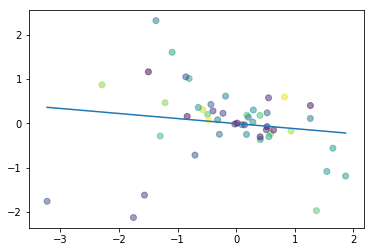

In [10]:
n=50
x=np.random.randn(n)
y=x*np.random.randn(n)

colors=np.random.rand(n)

plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.scatter(x,y,c=colors,alpha=0.5)
plt.show()

## Build model

In [11]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

In [12]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear=nn.Linear(in_features=input_size, out_features=output_size)
    
    def forward(self, x):
        return self.linear(x)

In [13]:
input_dim=1
output_dim=1

model=LinearRegressionModel(input_dim, output_dim)

In [14]:
criterion=nn.MSELoss()

In [15]:
learning_rate=0.01
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
epoches=100

x=[i for i in range(10)]
x_train=np.array(x, dtype=np.float32)
x_train=x_train.reshape(-1, 1) # make sure it only got one column

y=[2*i+1 for i in range(10)]
y_train=np.array(y, dtype=np.float32)
y_train=y_train.reshape(-1, 1)


for epoch in range(epoches):
  
    inputs=Variable(torch.from_numpy(x_train))
    labels=Variable(torch.from_numpy(y_train))
    
    # clear gradients and parameters
    optimizer.zero_grad()
    outputs=model(inputs)
    
    loss=criterion(outputs, labels)
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    print("epoch {}, loss {}".format(epoch, loss.data[0]))

epoch 0, loss 106.28778076171875
epoch 1, loss 18.60418701171875
epoch 2, loss 3.453016757965088
epoch 3, loss 0.832769513130188
epoch 4, loss 0.3774281442165375
epoch 5, loss 0.2961316406726837
epoch 6, loss 0.2794860005378723
epoch 7, loss 0.27403855323791504
epoch 8, loss 0.2705548107624054
epoch 9, loss 0.267439067363739
epoch 10, loss 0.2644151449203491
epoch 11, loss 0.2614351212978363
epoch 12, loss 0.2584902048110962
epoch 13, loss 0.2555789649486542
epoch 14, loss 0.2527005076408386
epoch 15, loss 0.24985432624816895
epoch 16, loss 0.24704034626483917
epoch 17, loss 0.24425789713859558
epoch 18, loss 0.2415069043636322
epoch 19, loss 0.23878693580627441
epoch 20, loss 0.23609760403633118
epoch 21, loss 0.23343853652477264
epoch 22, loss 0.23080937564373016
epoch 23, loss 0.22820977866649628
epoch 24, loss 0.22563953697681427
epoch 25, loss 0.2230982780456543
epoch 26, loss 0.22058573365211487
epoch 27, loss 0.21810121834278107
epoch 28, loss 0.2156449556350708
epoch 29, loss 0

In [24]:
estimated=model(Variable(torch.from_numpy(x_train))).data.numpy()
estimated

array([[  0.42598221],
       [  2.51752353],
       [  4.60906458],
       [  6.70060587],
       [  8.79214764],
       [ 10.88368893],
       [ 12.97523022],
       [ 15.06677151],
       [ 17.15831184],
       [ 19.24985313]], dtype=float32)

In [25]:
y_train

array([[  1.],
       [  3.],
       [  5.],
       [  7.],
       [  9.],
       [ 11.],
       [ 13.],
       [ 15.],
       [ 17.],
       [ 19.]], dtype=float32)

### plot the result

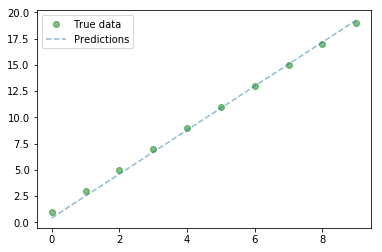

In [27]:
# clear the canvas
plt.clf()

estimated=model(Variable(torch.from_numpy(x_train))).data.numpy()

plt.plot(x_train, y_train, "go", label="True data", alpha=0.5) # "go": green, o for points
plt.plot(x_train, estimated, "--", label="Predictions", alpha=0.5)
plt.legend(loc="best") # auto locate the most appropriate location on graph
plt.show()

### save the model parameters

In [29]:
save_model=False
if save_model is True:
    torch.save(model.state_dict(), "basic_model.pkl")